# General Tips on BASH
### Back Up
- Every computer can fail
- Files need to be back-uped. Back-up is more than a mere copy.
- There are several type of back up
    - Full : a copy of everything
    - Incremental : 1. Full Back-up 2. Every new file is added. Changed files are duplicated. 
    - Differential: Only changes from the Full Back-up are saved. Slow.
    
In our case we want to back-up personal files and SERVER.
Typically we are using UNIX server that we access through **Secure Shell - SSH**


In [2]:
ssh user@adress.of.the.server

ssh: Could not resolve hostname adress.of.the.server: Name or service not known


: 255

# SSH
- Public Key
- Secure connection
We will just investigate ONE TIP.
In general the authentication goes through a password.
    - Portable
    - Unfeasable for automatic procedures
The alternative is to use add YOUR COMPUTER to the list of authenticated machine on the server (and viceversa).
A nice guide is available here: http://www.linuxproblem.org/art_9.html

To authenticate a computer you need a public/private rsa key, basically a very complex password that can be stored on the two computers. 

In [3]:
cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQC6D5Bgvs05LTQETDMTSbkDVfl/P4Nw+moa5kt4lZwBbNt1Q2E4uCUy4TLK9g77ANuPLVCmvRUeVjR2Gt7iQKpRftiQBpnRxIgMzwE9v3HSm9U4dROFtSdKGJLQx6hVS1mmewa61fTutMv/cbS+raKnc+2Acxml2fKzATQDBZL1RzOwImNG/vkuI8QdzKjX7dIQ0vFj/Nh0oAJdoxSCsdDNsd5K5EPgfhKhEAzdeM0HtxihYW8InCUszb6y7LGRD0k4qFEemJwcB4bhm9VMvrzJe1/3H6ZKMPD09Vau7VGxVhEXRB9zc00vnyNJ0WQuz/sJ1ob9JzVhiB6ZLJlk31vB fex@fex-treddi


The above is my passfrase that I just attach to the list of server where i want to have an easier access. 
This is done with few easy processes:
1. Generation of the password  from user *a* of computer *A* 

`
a@A:~> ssh-keygen -t rsa
Generating public/private rsa key pair.
Enter file in which to save the key (/home/a/.ssh/id_rsa): 
Created directory '/home/a/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /home/a/.ssh/id_rsa.
Your public key has been saved in /home/a/.ssh/id_rsa.pub.
The key fingerprint is:
3e:4f:05:79:3a:9f:96:7c:3b:ad:e9:58:37:bc:37:e4 a@A
`
2. Copy of the details of user *a* of *A* (a@A) to computer *B* where user *b* wants to have access:

``
a@A:~> ssh b@B mkdir -p .ssh           # ssh -p allows to pass a command to the accessed computer, in this case user a@A creates as user b@B the folder .ssh in home   
b@B's password:       
a@A:~> cat .ssh/id_rsa.pub | ssh b@B 'cat >> .ssh/authorized_keys'         # Copy of the key
b@B's password: 
a@A:~> ssh b@B                     # now you get free access to B as b with out writing the password. 
``

Of course this is true ONLY for UNIX* systems. Best approach on Non-Unix (M$) is to install the new Unix shell on Windows machine.  

Despite common use ssh command should *NEVER EVER BE ALIASED*. If once you setup a passkey you are too lazy to write

`
ssh user@server 
`

you should not define in your ~/.bashrc

`
alias LoginForLazypeople='ssh user@server'

`
You should modify your .ssh/config file. How to do so, goes beyond this talk, here you are mine as an example:


In [5]:
cat ~/.ssh/config

# Global settings
Host *
    Protocol 2 
# Protocol 1 well dodgy
    Compression yes
    ServerAliveCountMax 5  
# Up to 5 pings with no reply before hang up
    ServerAliveInterval 30 
# Seconds. Needs to be <60s for some home routers

# Enable Master Sessions - (for scp autocomplete + not hammering HPC facilities)
# See: http://unix.stackexchange.com/questions/32984/multiple-ssh-sessions-in-single-command/33012#33012
# To create a master: ssh -N -M target-host
# To delete a dead one: ssh -O exit target-host
ControlMaster auto
ControlPath ~/.ssh/control:%h:%p:%r

 
# These apply to any Bath host


#Host ldarwin
#	User fb462
#	HostName login.hpc.cam.ac.uk 

Host *.bath.ac.uk
	User fb318
#    PreferredAuthentications publickey
#    IdentityFile /home/jarvist/.ssh/bath_rsa

# These settings are specific to LCPU
Host lcpu
	User fb318
	HostName lcpu.bath.ac.uk
#    PreferredAuthentications publickey
#    IdentityFile /home/fex/.ssh/id_rsa
 
# These are specific to Aquila.  Note the use of 

Despite at first glance this seems weird, it is extremely easy. 
Meanwhile I mentioned ~/.bashrc In short this is a file which is loaded at the start-up and contains all the standard default command of your shell.

# Back-UP and File Copy
The easy normal way to copy files is *secure copy: scp*

In [6]:
time scp zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .
rm PROCAR

PROCAR                                        100% 4910KB  20.7MB/s   00:00    

real	0m0.301s
user	0m0.001s
sys	0m0.008s


A better, smarter way that support backups is *rsync*

In [7]:
time rsync -avzu zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .
rm PROCAR

receiving incremental file list
PROCAR

sent 30 bytes  received 269,177 bytes  538,414.00 bytes/sec
total size is 5,027,882  speedup is 18.68

real	0m0.133s
user	0m0.021s
sys	0m0.000s


rsync has many advantages. For example let's see what happens if you do not delete the files in terms of timing.


In [8]:
time scp zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .
time scp zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .


PROCAR                                        100% 4910KB  70.8MB/s   00:00    

real	0m0.075s
user	0m0.012s
sys	0m0.000s
PROCAR                                        100% 4910KB  70.4MB/s   00:00    

real	0m0.078s
user	0m0.004s
sys	0m0.008s


In [9]:
time rsync -avzu zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .
time rsync -avzu zeolite:~/Work/1_Hydrolysis/A_R33_Na_0NaOH_15W/MD_300K/PROCAR .
rm PROCAR

receiving incremental file list

sent 11 bytes  received 51 bytes  124.00 bytes/sec
total size is 5,027,882  speedup is 81,094.87

real	0m0.013s
user	0m0.007s
sys	0m0.000s
receiving incremental file list

sent 11 bytes  received 51 bytes  124.00 bytes/sec
total size is 5,027,882  speedup is 81,094.87

real	0m0.016s
user	0m0.003s
sys	0m0.006s


**scp** limites itselfs to just copy files. If a file it is just present, it will just copy the new version no-matter-what.
- simple
- slow and problematic for complex data-structure

**rsync** plus option is smart. It does not simply copy files, it also do a form of incremental backup that can be controlled with command options, as you noticed we run:

`
rsync  -avzu `
Let's check the manual and let's see what it tells US:

In [11]:
man rsync

rsync(1)                                                              rsync(1)

NAME
       rsync - a fast, versatile, remote (and local) file-copying tool

SYNOPSIS
       Local:  rsync [OPTION...] SRC... [DEST]

       Access via remote shell:
         Pull: rsync [OPTION...] [USER@]HOST:SRC... [DEST]
         Push: rsync [OPTION...] SRC... [USER@]HOST:DEST

       Access via rsync daemon:
         Pull: rsync [OPTION...] [USER@]HOST::SRC... [DEST]
               rsync [OPTION...] rsync://[USER@]HOST[:PORT]/SRC... [DEST]
         Push: rsync [OPTION...] SRC... [USER@]HOST::DEST
               rsync [OPTION...] SRC... rsync://[USER@]HOST[:PORT]/DEST

       Usages with just one SRC arg and no DEST arg will list the source files
       instead of copying.

DESCRIPTION
       Rsync is a fast and extraordinarily versatile file  copying  tool.   It
       can  copy  locally,  to/from  another  host  over  any remote shell, or
       to/from a remote rsync daemon.  It offers a  large  numb

       is not as easy to use as the first method.

       If  you  need  to transfer a filename that contains whitespace, you can
       either specify the --protect-args (-s) option, or you’ll need to escape
       the  whitespace  in  a  way that the remote shell will understand.  For
       instance:

              rsync -av host:'file\ name\ with\ spaces' /dest

CONNECTING TO AN RSYNC DAEMON
       It is also possible to use rsync without a remote shell as  the  trans‐
       port.  In this case you will directly connect to a remote rsync daemon,
       typically using TCP port 873.  (This obviously requires the  daemon  to
       be running on the remote system, so refer to the STARTING AN RSYNC DAE‐
       MON TO ACCEPT CONNECTIONS section below for information on that.)

       Using rsync in this way is the same as using it  with  a  remote  shell
       except that:

       o      you  either  use  a double colon :: instead of a single colon to
              separate the hostn

            --msgs2stderr           special output handling for debugging
        -q, --quiet                 suppress non-error messages
            --no-motd               suppress daemon-mode MOTD (see caveat)
        -c, --checksum              skip based on checksum, not mod-time & size
        -a, --archive               archive mode; equals -rlptgoD (no -H,-A,-X)
            --no-OPTION             turn off an implied OPTION (e.g. --no-D)
        -r, --recursive             recurse into directories
        -R, --relative              use relative path names
            --no-implied-dirs       don't send implied dirs with --relative
        -b, --backup                make backups (see --suffix & --backup-dir)
            --backup-dir=DIR        make backups into hierarchy based in DIR
            --suffix=SUFFIX         backup suffix (default ~ w/o --backup-dir)
        -u, --update                skip files that are newer on the receiver
            --inplace               upda

            --list-only             list the files instead of copying them
            --bwlimit=RATE          limit socket I/O bandwidth
            --stop-at=y-m-dTh:m     Stop rsync at year-month-dayThour:minute
            --time-limit=MINS       Stop rsync after MINS minutes have elapsed
            --write-batch=FILE      write a batched update to FILE
            --only-write-batch=FILE like --write-batch but w/o updating dest
            --read-batch=FILE       read a batched update from FILE
            --protocol=NUM          force an older protocol version to be used
            --iconv=CONVERT_SPEC    request charset conversion of filenames
            --checksum-seed=NUM     set block/file checksum seed (advanced)
        -4, --ipv4                  prefer IPv4
        -6, --ipv6                  prefer IPv6
            --version               print version number
       (-h) --help                  show this help (see below for -h comment)

       Rsync  can also be run a

              using   this   option,  you  should  start  up  a  daemon  using
              --no-detach so that you can see the stderr output on the  daemon
              side.

              This  option  has  the  side-effect  of making stderr output get
              line-buffered so that the merging of the output  of  3  programs
              happens in a more readable manner.

       -q, --quiet
              This  option  decreases  the amount of information you are given
              during the transfer, notably  suppressing  information  messages
              from  the  remote  server.  This  option is useful when invoking
              rsync from cron.

       --no-motd
              This option affects the information that is output by the client
              at  the  start  of  a daemon transfer.  This suppresses the mes‐
              sage-of-the-day (MOTD) text, but it also  affects  the  list  of
              modules  that the daemon sends in response to the "rsync 

              machine. If instead you used

                 rsync -avR /foo/bar/baz.c remote:/tmp/

              then a file named /tmp/foo/bar/baz.c would  be  created  on  the
              remote machine, preserving its full path.  These extra path ele‐
              ments are called "implied directories" (i.e. the "foo"  and  the
              "foo/bar" directories in the above example).

              Beginning  with  rsync  3.0.0,  rsync always sends these implied
              directories as real directories in the file list, even if a path
              element  is really a symlink on the sending side.  This prevents
              some really unexpected behaviors when copying the full path of a
              file  that you didn’t realize had a symlink in its path.  If you
              want to duplicate a server-side symlink, include both  the  sym‐
              link via its path, and referent directory via its real path.  If
              you’re dealing with an older rsync 

                     file.   Moreover, attempts to copy differing source files
                     onto a multiply-linked destination file will result in  a
                     "tug  of war" with the destination data changing back and
                     forth.

              o      In-use binaries cannot be updated  (either  the  OS  will
                     prevent  this from happening, or binaries that attempt to
                     swap-in their data will misbehave or crash).

              o      The file’s data will be in an inconsistent  state  during
                     the transfer and will be left that way if the transfer is
                     interrupted or if an update fails.

              o      A file that rsync cannot  write  to  cannot  be  updated.
                     While  a  super  user  can update any file, a normal user
                     needs to be granted write permission for the open of  the
                     file for writing to be successful.



              ures  whether  it wants munged symlinks via its "munge symlinks"
              parameter.  See also the "munge-symlinks"  perl  script  in  the
              support directory of the source code.

       -k, --copy-dirlinks
              This  option  causes  the  sending  side to treat a symlink to a
              directory as though it were a real directory.  This is useful if
              you  don’t  want  symlinks to non-directories to be affected, as
              they would be using --copy-links.

              Without this option, if the sending side has replaced  a  direc‐
              tory  with  a  symlink  to  a directory, the receiving side will
              delete anything that is in the way of the new symlink, including
              a  directory  hierarchy  (as  long  as --force or --delete is in
              effect).

              See also --keep-dirlinks for an analogous option for the receiv‐
              ing side.

              --copy-dirlinks  a

              one:

                 rsync -avZ src/ dest/

              (Caveat: make sure that -a  does  not  follow  -Z,  or  it  will
              re-enable the two "--no-*" options mentioned above.)

              The  preservation  of the destination’s setgid bit on newly-cre‐
              ated directories when --perms is off was added in  rsync  2.6.7.
              Older  rsync  versions  erroneously  preserved the three special
              permission bits for newly-created files when  --perms  was  off,
              while  overriding  the  destination’s  setgid  bit  setting on a
              newly-created directory.  Default ACL observance  was  added  to
              the  ACL  patch  for  rsync 2.6.7, so older (or non-ACL-enabled)
              rsyncs use the umask even if default ACLs are present.  (Keep in
              mind  that it is the version of the receiving rsync that affects
              these behaviors.)

       -E, --executability
              This opt

              is skipped.  Since early-create directories don’t have  accurate
              mode,  mtime, or ownership, the use of this option can help when
              someone wants to avoid these partially-finished directories.

       -J, --omit-link-times
              This tells rsync to omit symlinks when it is preserving  modifi‐
              cation times (see --times).

       --super
              This  tells  the receiving side to attempt super-user activities
              even if the receiving rsync wasn’t run by the super-user.  These
              activities  include:  preserving  users  via the --owner option,
              preserving all groups (not just the current user’s  groups)  via
              the  --groups  option,  and  copying  devices  via the --devices
              option.  This is useful for systems that allow  such  activities
              without  being  the  super-user,  and also for ensuring that you
              will get errors if the receiving 

              receiver requests to be transferred.

              This option can be useful for  those  doing  backups  using  the
              --link-dest  option when they need to continue a backup run that
              got interrupted.  Since a --link-dest run is copied into  a  new
              directory  hierarchy  (when it is used properly), using --ignore
              existing will ensure that the already-handled  files  don’t  get
              tweaked (which avoids a change in permissions on the hard-linked
              files).  This does mean that this option is only looking at  the
              existing files in the destination hierarchy itself.

       --remove-source-files
              This  tells  rsync  to  remove  from  the sending side the files
              (meaning non-directories) that are a part of  the  transfer  and
              have been successfully duplicated on the receiving side.

              Note  that  you should only use this option on source f

              files  (e.g. command-line arguments or --files-from entries), it
              is normally an error if the file cannot be found.   This  option
              suppresses  that  error,  and does not try to transfer the file.
              This does not affect subsequent vanished-file errors if  a  file
              was initially found to be present and later is no longer there.

       --delete-missing-args
              This  option  takes the behavior of (the implied) --ignore-miss‐
              ing-args option a step farther:  each missing arg will become  a
              deletion  request  of  the corresponding destination file on the
              receiving side (should it exist).  If the destination file is  a
              non-empty  directory,  it  will  only be successfully deleted if
              --force or --delete are in effect.  Other than that, this option
              is independent of any other type of delete processing.

              The  missing  sour


              If you want to have an option affect only the local  side  of  a
              transfer  when it normally affects both sides, send its negation
              to the remote side.  Like this:

                  rsync -av -x -M--no-x src/ dest/

              Be cautious using this, as it is possible to  toggle  an  option
              that  will  cause rsync to have a different idea about what data
              to expect next over the socket, and that will make it fail in  a
              cryptic fashion.

              Note  that it is best to use a separate --remote-option for each
              option you want to pass.  This makes your useage compatible with
              the --protect-args option.  If that option is off, any spaces in
              your remote options will be split by the remote shell unless you
              take steps to protect them.

              When performing a local transfer, the "local" side is the sender
              and the "remote" side

              the source dir -- any leading slashes are removed  and  no  ".."
              references  are  allowed  to go higher than the source dir.  For
              example, take this command:

                 rsync -a --files-from=/tmp/foo /usr remote:/backup

              If /tmp/foo contains the string  "bin"  (or  even  "/bin"),  the
              /usr/bin  directory will be created as /backup/bin on the remote
              host.  If it contains "bin/"  (note  the  trailing  slash),  the
              immediate  contents of the directory would also be sent (without
              needing to be explicitly mentioned in the file -- this began  in
              version  2.6.4).   In  both cases, if the -r option was enabled,
              that dir’s entire hierarchy would also be transferred  (keep  in
              mind that -r needs to be specified explicitly with --files-from,
              since it is not implied by -a).  Also note that  the  effect  of
              the  

              fied via --compare-dest, --copy-dest, or --link-dest.

              Note  that  the  use of the --delete option might get rid of any
              potential fuzzy-match files, so  either  use  --delete-after  or
              specify some filename exclusions if you need to prevent this.

       --compare-dest=DIR
              This  option  instructs  rsync  to  use  DIR  on the destination
              machine as an additional hierarchy to compare destination  files
              against  doing transfers (if the files are missing in the desti‐
              nation directory).  If a file is found in DIR that is  identical
              to  the  sender’s  file, the file will NOT be transferred to the
              destination directory.  This is useful  for  creating  a  sparse
              backup  of  just files that have changed from an earlier backup.
              This option is typically used to copy into an  empty  (or  newly
              created) directory.

   

              cial meaning.

              Here’s an example that specifies 6 suffixes to skip (since 1  of
              the 5 rules matches 2 suffixes):

                  --skip-compress=gz/jpg/mp[34]/7z/bz2

              The default list of suffixes that will not be compressed is this
              (in this version of rsync):

              7z ace avi bz2 deb gpg gz iso jpeg jpg lz lzma lzo mov  mp3  mp4
              ogg png rar rpm rzip tbz tgz tlz txz xz z zip

              This  list  will be replaced by your --skip-compress list in all
              but one situation: a copy from a  daemon  rsync  will  add  your
              skipped  suffixes  to its list of non-compressing files (and its
              list may be configured to a different default).

       --numeric-ids
              With this option rsync will transfer numeric group and user  IDs
              rather  than using user and group names and mapping them at both
              ends.

              By default r

              other verbose messages).

              The  "%i"  escape  has a cryptic output that is 11 letters long.
              The general format is like the string YXcstpoguax,  where  Y  is
              replaced  by the type of update being done, X is replaced by the
              file-type, and the other letters represent attributes  that  may
              be output if they are being modified.

              The update types that replace the Y are as follows:

              o      A  < means that a file is being transferred to the remote
                     host (sent).

              o      A > means that a file is being transferred to  the  local
                     host (received).

              o      A  c  means that a local change/creation is occurring for
                     the item (such as the creation  of  a  directory  or  the
                     changing of a symlink, etc.).

              o      A  h  means  that the item is a hard link to another item
   


              The current statistics are as follows:

              o      Number of files is the  count  of  all  "files"  (in  the
                     generic  sense),  which  includes  directories, symlinks,
                     etc.  The total count will  be  followed  by  a  list  of
                     counts by filetype (if the total is non-zero).  For exam‐
                     ple: "(reg: 5, dir: 3, link:  2,  dev:  1,  special:  1)"
                     lists  the  totals  for  regular files, directories, sym‐
                     links, devices, and special files.  If any of value is 0,
                     it is completely omitted from the list.

              o      Number  of created files is the count of how many "files"
                     (generic sense) were created  (as  opposed  to  updated).
                     The  total  count will be followed by a list of counts by
                     filetype (if the total is non-zero).

              o      Number of del

              your own exclude/hide/protect rule for the  partial-dir  because
              (1)  the  auto-added  rule may be ineffective at the end of your
              other rules, or (2) you may wish  to  override  rsync’s  exclude
              choice.   For  instance,  if you want to make rsync clean-up any
              left-over partial-dirs that may  be  lying  around,  you  should
              specify --delete-after and add a "risk" filter rule, e.g.  -f 'R
              .rsync-partial/'.  (Avoid using --delete-before or --delete-dur‐
              ing unless you don’t need rsync to use any of the left-over par‐
              tial-dir data during the current run.)

              IMPORTANT: the --partial-dir should not  be  writable  by  other
              users or it is a security risk.  E.g. AVOID "/tmp".

              You  can  also  set  the partial-dir value the RSYNC_PARTIAL_DIR
              environment variable.  Setting this in the environment does  not
          

              sion, and there are 169 more files for the receiver to check (to
              see if they are up-to-date or not)  remaining  out  of  the  396
              total files in the file-list.

              In  an  incremental  recursion  scan, rsync won’t know the total
              number of files in the file-list until it reaches  the  ends  of
              the scan, but since it starts to transfer files during the scan,
              it will display a line with the text "ir-chk"  (for  incremental
              recursion  check)  instead  of  "to-chk" until the point that it
              knows the full size of the list, at which point it  will  switch
              to using "to-chk".  Thus, seeing "ir-chk" lets you know that the
              total count of files in the file list is still going to increase
              (and  each  time it does, the count of files left to check  will
              increase by the number of the files added to the list).

       -P     T

              tion system while the multi-update cycle is happening).

              Also note that you only save bandwidth when pushing changes to a
              remote  system  because  this  allows  the  batched  data  to be
              diverted from the sender into the batch file without  having  to
              flow  over the wire to the receiver (when pulling, the sender is
              remote, and thus can’t write the batch).

       --read-batch=FILE
              Apply all of the changes stored in FILE, a file previously  gen‐
              erated  by  --write-batch.  If FILE is -, the batch data will be
              read from standard input.  See  the  "BATCH  MODE"  section  for
              details.

       --protocol=NUM
              Force  an older protocol version to be used.  This is useful for
              creating a batch file that is compatible with an  older  version
              of  rsync.   For instance, if rsync 2.6.4 is being used with the
            

              This option tells the rsync  daemon  to  use  the  given  FORMAT
              string  instead  of using the "log format" setting in the config
              file.  It also enables "transfer logging" unless the  string  is
              empty, in which case transfer logging is turned off.

       --sockopts
              This  overrides  the  socket  options setting in the rsyncd.conf
              file and has the same syntax.

       -v, --verbose
              This option increases the amount of information the daemon  logs
              during  its  startup phase.  After the client connects, the dae‐
              mon’s verbosity level will be controlled by the options that the
              client used and the "max verbosity" setting in the module’s con‐
              fig section.

       -4, --ipv4 or -6, --ipv6
              Tells rsync to prefer IPv4/IPv6 when creating the incoming sock‐
              ets  that  the  rsync daemon will use to listen for connections

              added in version 2.6.7.

       Note that, when using the --recursive (-r) option (which is implied  by
       -a),  every subcomponent of every path is visited from the top down, so
       include/exclude patterns get applied recursively to each subcomponent’s
       full  name (e.g. to include "/foo/bar/baz" the subcomponents "/foo" and
       "/foo/bar" must  not  be  excluded).   The  exclude  patterns  actually
       short-circuit  the directory traversal stage when rsync finds the files
       to send.  If a pattern excludes a particular parent directory,  it  can
       render  a  deeper  include  pattern  ineffectual  because rsync did not
       descend through that excluded section of the hierarchy.  This  is  par‐
       ticularly important when using a trailing ’*’ rule.  For instance, this
       won’t work:

              + /some/path/this-file-will-not-be-found
              + /file-is-included
              - *

       This fails because the parent direct

              If the merge rule specifies sides to affect (via the s or r mod‐
              ifier  or  both),  then  the  rules in the file must not specify
              sides (via a modifier or a rule prefix such as hide).

       Per-directory rules are inherited in all subdirectories of  the  direc‐
       tory  where  the merge-file was found unless the ’n’ modifier was used.
       Each subdirectory’s rules are prefixed to the  inherited  per-directory
       rules  from its parents, which gives the newest rules a higher priority
       than the inherited rules.   The  entire  set  of  dir-merge  rules  are
       grouped  together in the spot where the merge-file was specified, so it
       is possible to override dir-merge rules via a rule that  got  specified
       earlier in the list of global rules.  When the list-clearing rule ("!")
       is read from a per-directory file, it only clears the  inherited  rules
       for the current merge file.

       Another  way  to pr

              rsync -av --filter=':e .excl' host:src/dir /dest

       However, if you want to do a delete on the receiving side AND you  want
       some  files  to  be excluded from being deleted, you’ll need to be sure
       that the receiving side knows what files to exclude.  The  easiest  way
       is  to  include  the  per-directory merge files in the transfer and use
       --delete-after, because this ensures that the receiving side  gets  all
       the  same  exclude  rules as the sending side before it tries to delete
       anything:

              rsync -avF --delete-after host:src/dir /dest

       However, if the merge files are not a part of the transfer, you’ll need
       to either specify some global exclude rules (i.e. specified on the com‐
       mand line), or you’ll need to maintain  your  own  per-directory  merge
       files  on  the receiving side.  An example of the first is this (assume
       that the remote .rules files exclude themselves):

       rsy

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



`-v, --verbose               increase verbosity
-r, --recursive             recurse into directories
 -a, --archive               archive mode; equals -rlptgoD (no -H,-A,-X)
  -u, --update                skip files that are newer on the receiver
  -z, --compress              compress file data during the transfer
  --exclude=PATTERN       exclude files matching PATTERN
            --exclude-from=FILE     read exclude patterns from FILE
  `
  
  Basically in this implementation:
 1. Transfer only the difference of files
 2. compress the file before moving
 3. copy file in a backup-fashion
 4. you can automatically decide to exclude some files (e.g. CHGCAR)
 
 there is not huge difference with regular scp for normal small files, but the difference is **HUGE** on any large scale copy.

# NAS - Network-attached storage
thankfully we also have an automatic back-up.
- Using it is extremely easy.  
1. From local CU network download and install Synology Assistant

![alt text](nas1.png "login")

2. Login in with admin-T4v0l0stuL user/password. You will login into a web-based OS.
3. Select Active Back-up for server from the top bar. 
4. Select Linux Backup and create New from the top button

![alt text](nas2.png "login")

5. For back-up we decided to go for Multi-versioned
6. Insert the details of the connection

![alt text](nas3.png "login")

**ATTENTION** *Due to technical reason, please write the server address with some random capitalized letters something like* `ZeoLite` instead of `zeolite`. 

**ATTENTION2** IN 'ADVANCES' REMOVE HUGE FILE FROM BACK-UP NO CHG, CHGCAR WAVECAR ETC should be stored in a backup. So create some file filter.

7. We run the schedule on WE. 
8. We also have enable Smart Recycle with 128 number of versions and back-up rotation

![alt text](nas4.png "login")


# list of cool stuff
## Feedly 
- Makes possible to follow the RSS feed of journal
- my URL is available on my GitHUB: https://github.com/cippo1987/feedly_opml

![alt text](fed1.png "login")

You can reed in more details the abstract and the TOC

![alt text](fed2.png "login")

# Version Control
# GIT
'Torvalds quipped about the name git (which means unpleasant person in British English slang): "I'm an egotistical bastard, and I name all my projects after myself. First 'Linux', now 'git'."'
1. Created by Linus Torvald
2. Makes collaborative work easy
3. Open / GNU2.0
### Fair question: What is GIT?
It is easier to describe what you can do with git.
1. Stores and check all the version of a software into a rigid frameset. 
2. Allows different user to work at the same time on the same code
3. Allows edit of different user to became new independent software, or allows codes to merge together. 

![alt text](git1.png "login")

Practically GIT imposes the following structure:
- ALL USER have a complete copy of the project
- Before/after writing new code OWN CODE MUST BE SYNCHRONIZED WITH EVERYONE ELSE. During this process GIT shows the differences between the local user version and the common one
- If TWO+ Users modify in different way the SAME part of code, GIT allows to
    - pick only one version
    - split the two versions in different softwares
- One all the users agree with the final version GIT release a snapshot (the release!)

Practically nowadays most of entry-level-user use GITHUB, a service oriented to GIT

![alt text](git2.png "User Map")



# Why GITHUB is great
### Extra Feature
- Documentation, including automatically rendered README files in a variety of Markdown-like file formats (see README files on GitHub)
- WIKI-PAGES
- GitHub Pages: small websites can be hosted from public repositories on GitHub. The URL format is https://username.github.io
- Photoshop's native PSD format can be previewed and compared to previous versions of the same file.


### Hacking
- You can use GitHub to EDIT YOUR TEXT! Of course Github can only ocmpare ASCII, so only LaTex is supported. So far LaTex+GitHub is the better way to work with multiple people
- You can have an easy to use WEBSITE
- You can create a WIKI

I personally use GITHUB for my script, my small codes, and to store lot of information in a safe, delocalized way.
This include:
- my .bashrc
- my .gnuplot configuration
- my scripts
- my .profile


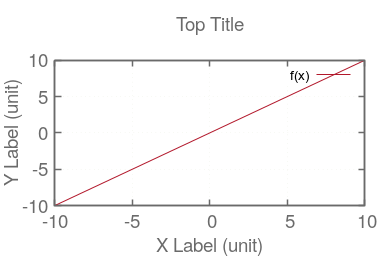

f(x)= x
set output '/tmp/gnuplot-inline-1555343834.0939932.786535720634.png'
plot f(x)






unset output


In [1]:
f(x)= x
plot f(x)